Данные для этого блокнота - data.csv









#### 1.  Откройте файл с таблицей (не забудьте про её формат). Выведите последние 10 строк.

Посмотрите на данные и скажите, что они из себя представляют, сколько в таблице строк, какие столбцы?

In [2]:
import pandas as pd

In [3]:
data = pd.read_csv("data.csv")

data.tail(10)

,order_id,quantity,item_name,choice_description,item_price
4612,1831,1,Carnitas Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",$9.25
4613,1831,1,Chips,NaN,$2.15
4614,1831,1,Bottled Water,NaN,$1.50
4615,1832,1,Chicken Soft Tacos,"[Fresh Tomato Salsa, [Rice, Cheese, Sour Cream]]",$8.75
4616,1832,1,Chips and Guacamole,NaN,$4.45
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",$11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",$11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",$11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",$8.75
4621,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",$8.75


#### 2.  Ответьте на вопросы:


1. Сколько заказов попало в выборку?
2. Сколько уникальных категорий товара было куплено? (item_name)


In [4]:
# 1
data.shape[0]

4622

In [5]:
# 2
len(data['item_name'].unique())

50

#### 3.  Есть ли в данных пропуски? В каких колонках? Как лучше- удалить или заменить? Реализуйте замену. Визуализируйте пропуски

In [6]:
data.isnull()

,order_id,quantity,item_name,choice_description,item_price
0,False,False,False,True,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,True,False
4,False,False,False,False,False
...,...,...,...,...,...
4617,False,False,False,False,False
4618,False,False,False,False,False
4619,False,False,False,False,False
4620,False,False,False,False,False


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            4622 non-null   int64 
 1   quantity            4622 non-null   int64 
 2   item_name           4622 non-null   object
 3   choice_description  3376 non-null   object
 4   item_price          4622 non-null   object
dtypes: int64(2), object(3)
memory usage: 180.7+ KB


In [7]:
# Столец choice_description содержит пропущенные значния

Удалите пропуски

In [8]:
data = data.dropna()

#### 4.  Посмотрите внимательнее на колонку с ценой товара. Какого она типа? Создайте новую колонку так, чтобы в ней цена была числом).

In [9]:
data['item_price_num'] = data['item_price'].map(lambda x: float(x[1:]))

In [10]:
data.head()

,order_id,quantity,item_name,choice_description,item_price,item_price_num
1,1,1,Izze,[Clementine],$3.39,3.39
2,1,1,Nantucket Nectar,[Apple],$3.39,3.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98,16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98,10.98
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75,11.75


Какая средняя/минимальная/максимальная цена у товара? 

In [11]:
d = data.item_price_num.describe()
print(f"Средняя цена = {d[1]}")
print(f"Минимальная цена = {d[3]}")
print(f"Максимальная цена = {d[7]}")

Средняя цена = 9.011321090047394
Минимальная цена = 1.09
Максимальная цена = 35.25


Удалите старую колонку с ценой.

In [12]:
data = data.drop('item_price', 1)

In [13]:
data.head()

,order_id,quantity,item_name,choice_description,item_price_num
1,1,1,Izze,[Clementine],3.39
2,1,1,Nantucket Nectar,[Apple],3.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",10.98
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",11.75


#### 5.  Какие 5 товаров были самыми дешёвыми и самыми дорогими? (по item_name)

Для этого будет удобно избавиться от дубликатов и отсортировать товары. Не забудьте про количество товара.

In [14]:
udata = data.drop_duplicates(subset='item_name')
udata = data.sort_values(by='item_price_num')

In [15]:
udata.head()

,order_id,quantity,item_name,choice_description,item_price_num
3221,1288,1,Canned Soda,[Mountain Dew],1.09
3006,1195,1,Canned Soda,[Coca Cola],1.09
117,51,1,Canned Soda,[Diet Dr. Pepper],1.09
4051,1621,1,Canned Soda,[Sprite],1.09
3926,1575,1,Canned Soda,[Dr. Pepper],1.09


In [16]:
udata.tail()

,order_id,quantity,item_name,choice_description,item_price_num
409,178,3,Chicken Bowl,"[[Fresh Tomato Salsa (Mild), Tomatillo-Green C...",32.94
3601,1443,3,Veggie Burrito,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",33.75
3602,1443,4,Chicken Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Chees...",35.00
1254,511,4,Chicken Burrito,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",35.00
3480,1398,3,Carnitas Bowl,"[Roasted Chili Corn Salsa, [Fajita Vegetables,...",35.25


#### 6.  Сколько раз клиенты покупали больше 1 Chicken Bowl (item_name)?

In [17]:
cb = data[(data['item_name'] == 'Chicken Bowl') & (data['quantity'] > 1)]

In [18]:
cb.shape[0]

33

#### 7. Какой средний чек у заказа? Сколько в среднем товаров покупают? 



Если необходимо провести вычисления в терминах заказов, то будет удобно сгруппировать строки по заказам и посчитать необходимые статистики. Визуализируйте статистики

In [19]:
grouped_data = data.groupby(by='order_id')

In [20]:
grouped_data.head()

,order_id,quantity,item_name,choice_description,item_price_num
1,1,1,Izze,[Clementine],3.39
2,1,1,Nantucket Nectar,[Apple],3.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",10.98
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",11.75
...,...,...,...,...,...
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",8.75


In [21]:
order_describe = data.groupby(by='order_id').describe()

In [22]:
order_describe.head()

quantity                                    item_price_num         \
            count mean  std  min  25%  50%  75%  max          count   mean   
order_id                                                                     
1             2.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0            2.0   3.39   
2             1.0  2.0  NaN  2.0  2.0  2.0  2.0  2.0            1.0  16.98   
3             1.0  1.0  NaN  1.0  1.0  1.0  1.0  1.0            1.0  10.98   
4             2.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0            2.0  10.50   
5             1.0  1.0  NaN  1.0  1.0  1.0  1.0  1.0            1.0   9.25   

                                                         
               std    min     25%    50%     75%    max  
order_id                                                 
1         0.000000   3.39   3.390   3.39   3.390   3.39  
2              NaN  16.98  16.980  16.98  16.980  16.98  
3              NaN  10.98  10.980  10.98  10.980  10.98  
4         1.767767   9.25   9.875  10.50  11.125  11.75  
5              NaN   9.25   9.250   9.25   9.250   9.25

<AxesSubplot:ylabel='Frequency'>

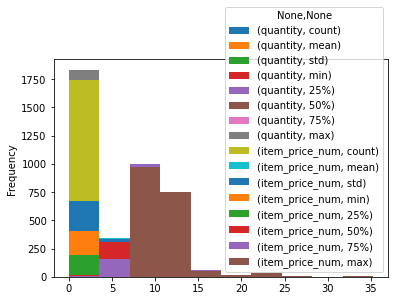

In [23]:
order_describe.plot.hist(by='count')

#### 8.  Сколько заказов содержали ровно 1 товар?

In [56]:
c = len([i for i in list(grouped_data['quantity'].head()) if i == 1])

In [57]:
print(f"Ровно один товар содержало {c} заказов")

Ровно один товар содержало 3127 заказов


#### 9.  Какая самая популярная категория товара? 

In [61]:
grouped_data_by_item_name = data.groupby(by="item_name").describe()

In [71]:
grouped_data_by_item_name['order_id'].sort_values(by="count").tail(1)

,count,mean,std,min,25%,50%,75%,max
item_name,,,,,,,,
Chicken Bowl,726.0,983.369146,503.75665,2.0,599.5,974.5,1411.0,1828.0


#### 10. Какие виды Burrito существуют? Какой из них чаще всего покупают? Какой из них самый дорогой? 

In [77]:
b = data[data['item_name'].str.contains('Burrito')]

In [78]:
b.head()

,order_id,quantity,item_name,choice_description,item_price_num
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",11.75
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",9.25
16,8,1,Chicken Burrito,"[Tomatillo-Green Chili Salsa (Medium), [Pinto ...",8.49
17,9,1,Chicken Burrito,"[Fresh Tomato Salsa (Mild), [Black Beans, Rice...",8.49
21,11,1,Barbacoa Burrito,"[[Fresh Tomato Salsa (Mild), Tomatillo-Green C...",8.99


In [81]:
print(f"Виды Burrito:{b['item_name'].unique()}")

Виды Burrito:['Steak Burrito' 'Chicken Burrito' 'Barbacoa Burrito' 'Carnitas Burrito'
 'Veggie Burrito' 'Burrito']


In [85]:
db = b.groupby("item_name").describe()

In [86]:
db

order_id                                                \
                    count        mean         std    min     25%    50%   
item_name                                                                 
Barbacoa Burrito     91.0  821.076923  555.170029   11.0  302.50  748.0   
Burrito               6.0  258.333333   49.078169  214.0  214.75  248.0   
Carnitas Burrito     59.0  875.457627  556.825743   14.0  397.00  844.0   
Chicken Burrito     553.0  899.282098  528.027208    8.0  462.00  895.0   
Steak Burrito       368.0  892.491848  538.512954    4.0  413.75  891.0   
Veggie Burrito       95.0  852.231579  520.757293   26.0  364.50  801.0   

                                 quantity            ...            \
                     75%     max    count      mean  ...  75%  max   
item_name                                            ...             
Barbacoa Burrito  1286.5  1827.0     91.0  1.000000  ...  1.0  1.0   
Burrito            304.5   313.0      6.0  1.000000  ...  1.0  1.0   
Carnitas Burrito  1377.5  1821.0     59.0  1.016949  ...  1.0  2.0   
Chicken Burrito   1378.0  1817.0    553.0  1.068716  ...  1.0  4.0   
Steak Burrito     1366.0  1833.0    368.0  1.048913  ...  1.0  3.0   
Veggie Burrito    1303.0  1830.0     95.0  1.021053  ...  1.0  3.0   

                 item_price_num                                             \
                          count       mean           std   min   25%   50%   
item_name                                                                    
Barbacoa Burrito           91.0   9.832418  1.139519e+00  8.69  9.25  9.25   
Burrito                     6.0   7.400000  9.729507e-16  7.40  7.40  7.40   
Carnitas Burrito           59.0  10.132712  1.630111e+00  8.69  9.25  9.25   
Chicken Burrito           553.0  10.082857  2.810144e+00  8.19  8.75  8.75   
Steak Burrito             368.0  10.465842  2.571981e+00  8.69  8.99  9.25   
Veggie Burrito             95.0   9.839684  2.795877e+00  8.49  8.49  8.75   

                                
                    75%    max  
item_name                       
Barbacoa Burrito  11.28  11.75  
Burrito            7.40   7.40  
Carnitas Burrito  11.75  18.50  
Chicken Burrito   11.25  35.00  
Steak Burrito     11.75  27.75  
Veggie Burrito    11.25  33.75  

[6 rows x 24 columns]

In [95]:
print(f"Чаще всего покупают {db['quantity']['count'].idxmax()}")

Чаще всего покупают Chicken Burrito


In [97]:
print(f"Самый дорогой {db['item_price_num']['max'].idxmax()}")

Самый дорогой Chicken Burrito
